In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

PREPROCESSING

In [3]:
df=pd.read_csv('nasa dataset.csv')
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2458161.642,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2457794.969,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2458120.468,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2457902.337,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219878,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2457814.455,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2457708.228,304.306024,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2458087.617,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501181,...,37.026468,690.054279,0.965760,274.692712,2.090708,2458300.480,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802909,662.048343,1.185467,180.346090,1.787733,2458288.261,203.524965,0.543767,J2000,False


In [4]:
df=df.drop("Close Approach Date",axis=1)


In [5]:
df=df.drop("Orbit Determination Date",axis=1)

In [6]:
df=df.drop("Orbiting Body",axis=1)

In [7]:
df=df.drop("Equinox",axis=1)

In [8]:
df.iloc[2,:-1]

Neo Reference ID                       2446862
Name                                   2446862
Absolute Magnitude                        20.3
Est Dia in KM(min)                    0.231502
Est Dia in KM(max)                    0.517654
Est Dia in M(min)                   231.502122
Est Dia in M(max)                   517.654482
Est Dia in Miles(min)                 0.143849
Est Dia in Miles(max)                 0.321655
Est Dia in Feet(min)                759.521423
Est Dia in Feet(max)               1698.341531
Epoch Date Close Approach       789552000000.0
Relative Velocity km per sec          7.590711
Relative Velocity km per hr        27326.56018
Miles per hour                      16979.6618
Miss Dist.(Astronomical)              0.050956
Miss Dist.(lunar)                     19.82189
Miss Dist.(kilometers)               7622911.5
Miss Dist.(miles)                    4736657.5
Orbit ID                                    22
Orbit Uncertainity                           0
Minimum Orbit

In [9]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.5, random_state=0)

In [11]:
print(Y_test)
print(X_test)


4034    False
3607    False
3933    False
1736     True
1533    False
        ...  
1950    False
3045    False
3598     True
340     False
4619    False
Name: Hazardous, Length: 2344, dtype: bool
      Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
4034           3694458  3694458                26.3            0.014607   
3607           2345646  2345646                19.9            0.278327   
3933           3471589  3471589                23.4            0.055533   
1736           2434326  2434326                18.4            0.555335   
1533           2271480  2271480                17.6            0.802703   
...                ...      ...                 ...                 ...   
1950           3330688  3330688                23.6            0.050647   
3045           3558381  3558381                25.8            0.018389   
3598           3455100  3455100                21.3            0.146068   
340            3645308  3645308                24.6  

STANDERDIZATION

In [12]:
st_x=StandardScaler()
X_train=st_x.fit_transform(X_train)
X_test=st_x.transform(X_test)


In [13]:
X_test

array([[ 0.76888449,  0.76888449,  1.42223037, ..., -0.92340169,
        -1.54594263, -1.07962125],
       [-1.69363133, -1.69363133, -0.80271339, ...,  0.05156882,
        -0.77329252, -0.66152439],
       [ 0.36199425,  0.36199425,  0.41405273, ...,  0.3623937 ,
         0.53706978,  2.01617654],
       ...,
       [ 0.3318904 ,  0.3318904 , -0.31600694, ...,  0.25752739,
         0.34387816,  0.02848056],
       [ 0.6791517 ,  0.6791517 ,  0.83122969, ...,  0.34709618,
         1.19297714, -0.15209997],
       [ 0.88736462,  0.88736462, -0.10741847, ..., -0.19863374,
        -0.51655165, -1.26864077]])

In [14]:
X_train

array([[ 0.8611422 ,  0.8611422 ,  1.10934766, ...,  0.23629858,
        -1.51939029, -0.19426266],
       [ 0.82486752,  0.82486752, -0.14218321, ...,  0.63830033,
         0.6174831 , -1.19620894],
       [ 0.3318904 ,  0.3318904 , -0.31600694, ...,  0.25752739,
         0.34387816,  0.02848056],
       ...,
       [ 0.91610284,  0.91610284,  1.5007987 , ...,  0.22063897,
        -1.45831727, -0.38209549],
       [-2.16807767, -2.16807767, -1.04606662, ..., -2.52788841,
        -0.45596801, -0.40168599],
       [ 0.3735947 ,  0.3735947 , -0.83747814, ...,  0.31934427,
         1.48053835, -1.0754772 ]])

In [23]:
classifier = DecisionTreeClassifier(random_state=0)
classifier =classifier.fit(X_train,Y_train)


In [24]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9953071672354948


In [25]:
y_pred

array([False, False, False, ...,  True, False, False])

In [26]:
confusion=confusion_matrix(Y_test,y_pred)
confusion

array([[1961,    4],
       [   7,  372]])

for converting a string to float in dataset


In [ ]:
#for coln in df:
  #df[coln]=df[coln].astype(category).cat.codes

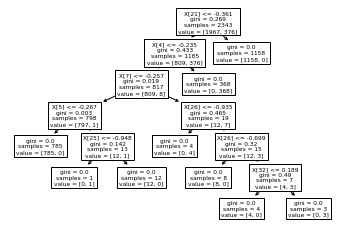

In [27]:
tree.plot_tree(classifier);

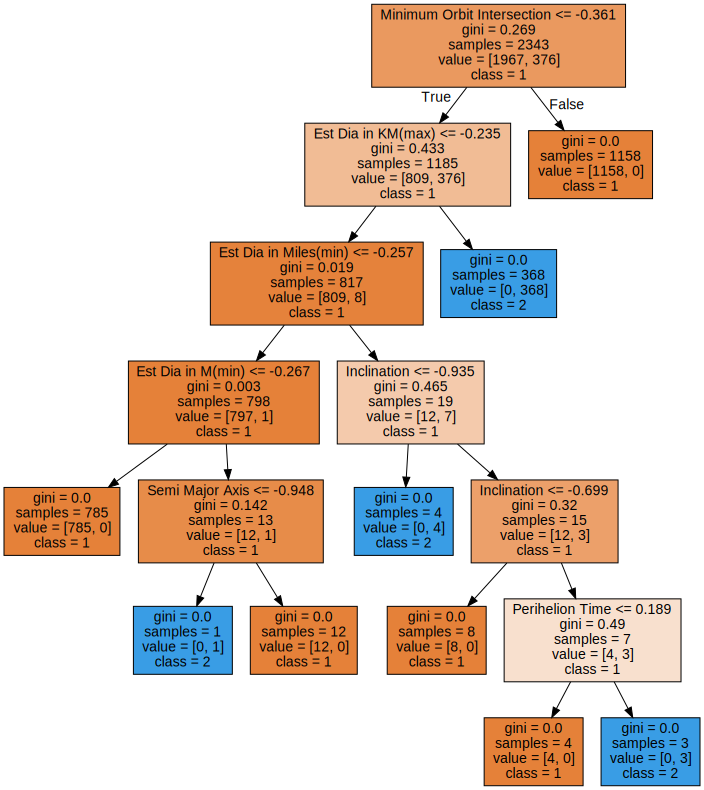

In [28]:
graphviz.Source(export_graphviz(classifier,feature_names=X.columns,filled=True,class_names=['1','2','3','4','5','6','7'],out_file=None))